# Lab 13: Regression Inference

# Intro
Welcome to Lab 13!

Today we will get some hands-on practice making inferences using regression models. You can find more information about this topic in
[the textbook](http://www.inferentialthinking.com/chapter5/regression.html).

#### Administrative details
Lab submissions are due by **Friday, April 22 at 7:00 PM**.

As usual, if you attend lab section and make a good effort but don't finish during the 2 hours, let your TA know,
and you'll get full credit for the lab.  If you do that, please finish the lab on your own time (or in office hours, of course).

In [1]:
# Run this cell, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

# These lines load the tests.
from client.api.assignment import load_assignment
lab13 = load_assignment('lab13.ok')

Assignment: Lab 13
OK, version v1.5.1



In [2]:
# Here are some useful functions. Just run this cell.
def standard_units(any_numbers):
    """
    Convert any array of numbers to standard units.
    
    any_numbers is an array of numbers.
    """
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

def correlation(t, x, y):
    """
    The correlation between two columns.
    
    x and y are the names of columns in t.
    """
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

def slope(table, x, y):
    """
    The slope of the regression line (in original units).
    
    x and y are the names of columns in table.
    """
    r = correlation(table, x, y)
    return r * np.std(table.column(y))/np.std(table.column(x))

def intercept(table, x, y):
    """
    The intercept of the regression line (in original units).
    
    x and y are the names of columns in table.
    """
    a = slope(table, x, y)
    return np.mean(table.column(y)) - a * np.mean(table.column(x))

def fit(table, x, y):
    """
    Return the height of the regression line at each x value.
    
    x and y are the names of columns in table.
    """
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

def mean_squared_error(table, x, y):
    """
    Return a function that computes the mean squared error when a
    line is used to predict column y from column x in table.
    
    x and y are the names of columns in table.  We're predicting
    y using x.
    
    The returned function takes two arguments, a and b.  a is the
    slope of a line, and b is the intercept of a line.  The
    returned function returns the mean squared error when the line
    a*x + b is used to predict column y in table.
    """
    def for_line(a, b):
        estimate = a * table.column(x) + b
        return np.mean((table.column(y) - estimate) ** 2)
    return for_line

def residual_plot(table, x, y):
    """
    Plot the residuals of a linear regression of column x on
    column y in table.
    
    x and y are the names of columns in table.  We're predicting
    y using x.
    """
    fitted = fit(table, x, y)
    residuals = table.column(y) - fitted
    res_table = Table().with_columns([
            'predictor', table.column(x), 
            'residuals', residuals])
    res_table.scatter(0, 1)

# 1. How Faithful is Old Faithful? 

(Note: clever title comes from [here](http://web.pdx.edu/~jfreder/M212/oldfaithful.pdf).)

Old Faithful is a geyser in Yellowstone National Park in the central United States.  It's famous for erupting on a fairly regular schedule.  You can see a video below.

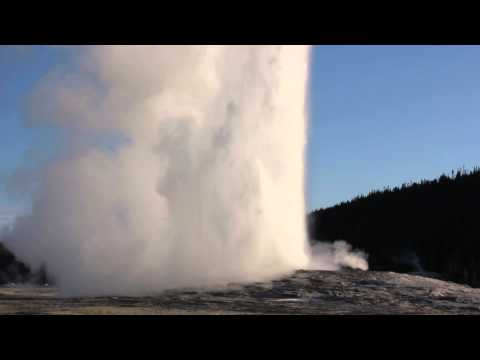

In [3]:
# For the curious: this is how to display a YouTube video in a
# Jupyter notebook.  The argument to YouTubeVideo is the part
# of the URL (called a "query parameter") that identifies the
# video.  For example, the full URL for this video is:
#   https://www.youtube.com/watch?v=wE8NDuzt8eg&ab_channel=RickBeach
from IPython.display import YouTubeVideo
YouTubeVideo("wE8NDuzt8eg")

Today we are working with a dataset about Old Faithful, which relates how long the geyser takes to erupt again with the length of the previous eruption.
The table contains the following columns:
- **eruptions**: Eruption time in minutes
- **waiting**: Waiting time to next eruption, also in minutes

We would like to predict the time to the next eruption using the duration of the current eruption. In general, the longer an eruption lasts, the longer the interval until the next eruption.

We would to use linear regression, but that wouldn't work well if the data weren't roughly linearly related. What does that mean? That means you could imagine that the data were generating by choosing a slope $a$ and an intercept $b$ and then following these steps for each point:
1. Pick a true eruption length $x$.  This can be done however we want -- in particular, it doesn't have to be drawn from a Normal distribution.
2. Calculate a "noise-free" version of the waiting time $y_{\text{noise-free}}$ as $a \times x + b$.
3. Calculate the actual waiting time $y$ by adding a random number $e$ to $y_{\text{noise-free}}$ to make it smaller or larger.

So the points will look like they're on a line, but pushed randomly up or down so that the line no longer perfectly contains every point.

eruptions,waiting
3.6,79
1.8,54
3.333,74
2.283,62
4.533,85
2.883,55
4.7,88
3.6,85
1.95,51
4.35,85


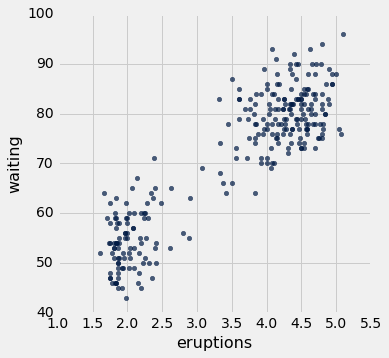

In [4]:
# Just run this cell.
faithful = Table.read_table('faithful.csv')
faithful = faithful.with_column('waiting', faithful.column('waiting').astype('float64'))
faithful.scatter('eruptions', 'waiting')
faithful

**Question 1.1.** Just using your eyes, does it look like the data are roughly linearly related?

Yes, the data are roughly linearly related because the data fit well with the regression line.

We're going to continue with the provisional assumption that they are linearly related, so there is some "true" regression line from which Tyche generated the data we see.  We'll further suppose that other data from Old Faithful would continue to follow this model.

**Question 1.2.** Make a residual plot using the given `residual_plot` function.

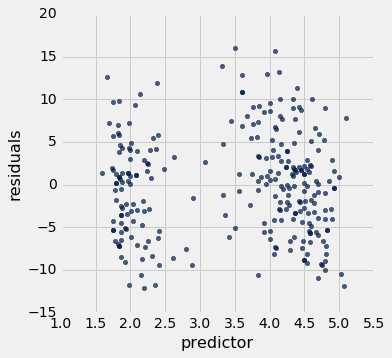

In [5]:
residual_plot(faithful, 'eruptions', 'waiting')

**Question 1.3.** Determine the slope and intercept of the linear regression of waiting time on eruption duration. Use the given functions `slope` and `intercept`, and use the whole `faithful` table as your training set.

In [8]:
a = slope(faithful, 'eruptions', 'waiting')
b = intercept(faithful, 'eruptions', 'waiting')
print(a, '* x +', b)

10.7296413951 * x + 33.4743970228


In [9]:
_ = lab13.grade("q13")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



**Question 1.4.** How well does this line fit the training data, on average?  Answer this question quantitatively by computing the correlation between `eruptions` and `waiting`.

In [11]:
r = correlation(faithful,'eruptions', 'waiting')
r

0.90081116832181318

In [12]:
_ = lab13.grade("q14")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



You should have found that the correlation is fairly close to 1, so the line fits fairly well on the training data.

However, unless you have a strong reason to believe that the linear regression model is true, you should be wary of applying your prediction model to data that are very different from the training data.

**Question 1.5.** Using this line, what is the predicted waiting time for an eruption that lasts 0 minutes? 2 minutes? An hour?

In [17]:
zero_wait = 10.7296413951 * 0 + 33.4743970228
two_minutes_wait = 10.7296413951 * 2 + 33.4743970228
hour_wait = 10.7296413951 * 60 + 33.4743970228
print("For an eruption that lasts 0 minutes, the predicted waiting time is", zero_wait, "minutes.")
print("For an eruption that lasts 2 minutes, the predicted waiting time is", two_minutes_wait, "minutes.")
print("For an eruption that lasts an hour, the predicted waiting time is", hour_wait, "minutes.")

For an eruption that lasts 0 minutes, the predicted waiting time is 33.4743970228 minutes.
For an eruption that lasts 2 minutes, the predicted waiting time is 54.933679813 minutes.
For an eruption that lasts an hour, the predicted waiting time is 677.2528807287999 minutes.


In [18]:
_ = lab13.grade("q15")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



**Question 1.6.** Do you believe any of these values are reliable predictions?  If you don't believe some of them, say why.

_Write your answer here._

**Question 1.7.** Define a function `fitted_value` which essentially does the above two steps for any arbitrary table, x label, y label, and x value. It should return the height of the regression line at that specific x value, where the line is computed by regressing column `y` of `table` on column `x` of `table`.

In [94]:
def fitted_value(table, x, y, given_x):
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * given_x + b

# Here's an example of how fitted_value is used.  This should
# compute the same value you computed in question 1.5.
new_two_minutes_wait = fitted_value(faithful, 'eruptions', 'waiting', 2)
new_two_minutes_wait





54.933679813020404

In [34]:
_ = lab13.grade("q17")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



# 2. Bootstrapped Prediction Intervals
We said that we "trust" certain predictions made by our model more than others.  Let's try to be more quantitative about that.  Figuring out the accuracy of an estimate or prediction is called *inference*.

Recall the bootstrap procedure we used to compute confidence intervals for estimates:
1. Resample many times from our sample, drawing with replacement the same size as the original sample.  The idea is to simulate something like sampling from the original population.
2. Compute our statistic on each resample.
3. Use the distribution of those statistics to estimate the variation of the estimate.

It turns out that we can do something similar for regression lines and predictions!

**Question 2.1.** Complete the `bootstrap_lines` function, which should generate `B` resamples from `faithful` and compute the slope and intercept of the regression line (of `waiting` on `eruptions`) for the resampled points. The resulting `B` different slopes and intercepts should be returned in a table.

In [68]:
def bootstrap_lines(B):
    lines = Table(['slope', 'intercept'])
    for i in np.arange(1000):
        boot_sample = faithful.sample(with_replacement = True)
        a = slope(boot_sample, 'eruptions', 'waiting')
        b = intercept(boot_sample, 'eruptions', 'waiting')
        lines.append([a,b])
    return lines
        
regression_lines = bootstrap_lines(1000)
regression_lines

slope,intercept
11.0949,32.4774
10.2081,35.8403
9.99357,35.8764
10.76,33.2174
10.8739,33.1048
10.8497,33.3603
11.0489,32.1693
11.2696,31.0871
10.6476,34.3125
10.4953,34.7758


In [60]:
_ = lab13.grade("q21")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



Here are some plots of the lines you generated.  We've made the lines partially transparent, so where the lines appear dark, many lines are overlapping, and where they appear faint, only a few lines are overlapping.  If not many lines overlap at an x-value, then the prediction for that x-value is less certain.

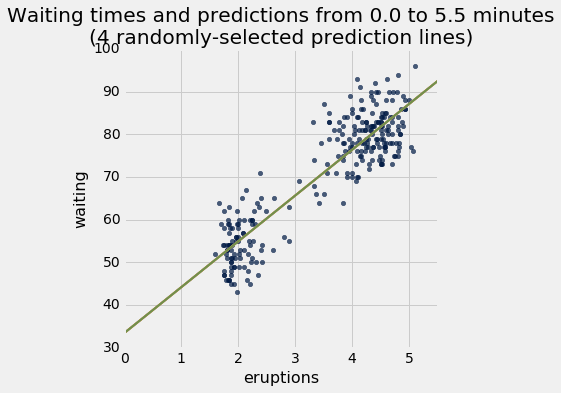

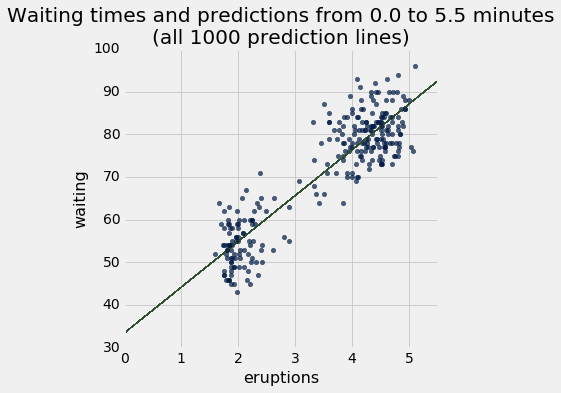

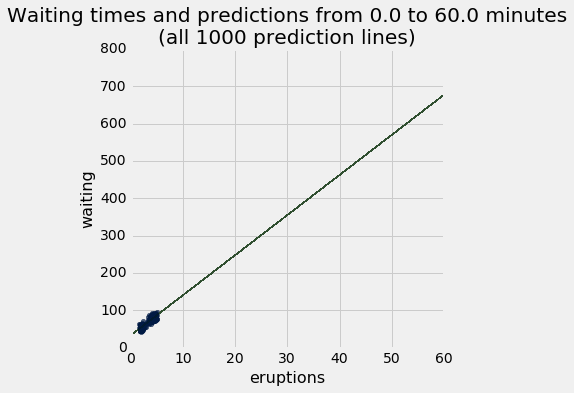

In [41]:
# Just run this cell.  Read it if you'd like to see how to generate
# plots like these.
def plot_lines(num_lines, min_x, max_x):
    # Plot all the actual data.
    faithful.scatter('eruptions', 'waiting')
    xs = np.array([min_x, max_x])
    some_lines = regression_lines.sample(num_lines)
    # Now plot some of the lines.
    for resample_idx in range(some_lines.num_rows):
        resample_slope = some_lines.column('slope').item(resample_idx)
        resample_intercept = some_lines.column('intercept').item(resample_idx)
        predictions = xs*resample_slope + resample_intercept
        # Calling plt.plot again will add a line to the scatter plot we
        # made above.  So we add a line to the plot each time we go
        # through this loop.
        # "alpha" is a computer graphics term.  It refers to the degree
        # of opacity of the plotted line.  0 means invisible.
        plt.plot(xs, predictions, lw=2, alpha=4/num_lines)
    plt.xlim([min_x, max_x])
    prediction_lines_message = "%d randomly-selected prediction lines" % num_lines if num_lines < regression_lines.num_rows else "all %d prediction lines" % num_lines
    plt.title("Waiting times and predictions from %.1f to %.1f minutes\n(%s)" % (min_x, max_x, prediction_lines_message))

plot_lines(4, 0, 5.5)
plot_lines(1000, 0, 5.5)
plot_lines(1000, 0, 60)

Notice that the lines get more spread out as we move away from the training data.

**Question 2.2.** Now we have the ability to generate a bunch of lines fitted to different resamples of the data. Suppose we would like to give a confidence interval for the predicted waiting time after an eruption that lasted a given number minutes.  A confidence interval for an ordinary estimate reflects the fact that we could have computed different statistics if we'd seen a different sample of a population.  In the same way, our confidence interval for a prediction should reflect the fact that, if we'd used a different set of training data to form our regression line, we would have made different predictions.

The `prediction_interval` function takes as input an eruption length (in minutes) and should return a 95% confidence interval for the predicted waiting time after an eruption of that length, using 1000 resamples. More precisely, it should return a list of 2 numbers, where the first number is the low end of the interval, and the second number is the high end of the interval. You should use the `bootstrap_lines` from the previous question.

*Hint:* Instead of using a `for` loop to compute each prediction, take advantage of array arithmetic. In addition to looking cleaner, array arithmetic turns out to run faster than `for` loops, and you will notice the difference in this case.

In [110]:
def prediction_interval(x):
    boot_lines = bootstrap_lines(1000)
    predictions = boot_lines.column(0) * x + boot_lines.column(1) 
    
    return [percentile(2.5, predictions), percentile(97.5, predictions)]


In [81]:
_ = lab13.grade("q22")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.3** Fill in the cell below to generate prediction intervals for $x = 1, 2, 3, \dots, 8, 9, 10$.  It will take about 10 seconds to run.

In [89]:
intervals = Table().with_columns(["eruptions", [], "left end", [], "right end", []])
for x in np.arange(1, 11):
    # Fill in the next line so that interval is the confidence interval
    # for predictions when eruption duration is x.
    interval = prediction_interval(x)
    intervals.append([x, interval[0], interval[1]])

def width(left_end, right_end):
    return right_end - left_end

intervals.append_column("width", intervals.apply(width, ["left end", "right end"]))
intervals

eruptions,left end,right end,width
1,42.5702,45.8353,3.26514
2,53.8663,56.0738,2.20749
3,64.9343,66.4282,1.49389
4,75.6127,77.1225,1.50984
5,85.9979,88.2134,2.21553
6,96.2479,99.3995,3.15166
7,106.287,110.702,4.41533
8,116.639,122.259,5.62001
9,126.734,133.476,6.74186
10,136.618,144.84,8.22177


In [90]:
_ = lab13.grade("q23")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.4.** What is happening with the widths of the confidence intervals? What does this mean and why is this phenomenon occuring? 

_Write your answer here._

As with confidence intervals for estimates, people often get confused about the interpretation of confidence intervals for predictions.

**Question 2.5.** Is it true that the 95% confidence interval you've computed for, say, an eruption duration of 2 minutes covers roughly 95% of the *training data* with an eruption duration of roughly 2 minutes?  To help you answer this question, we've made some scatter plots of the training data and your confidence intervals.

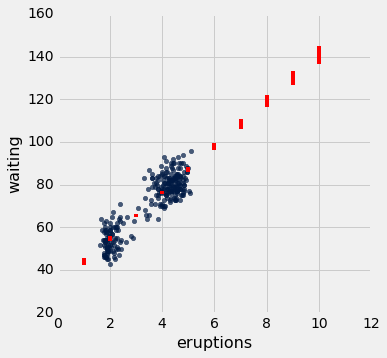

In [91]:
# Run this cell to see your confidence intervals overlaid against
# the data.
faithful.scatter(0, 1)
for point_idx in range(intervals.num_rows):
    x = intervals.column("eruptions").item(point_idx)
    low = intervals.column("left end").item(point_idx)
    high = intervals.column("right end").item(point_idx)
    plt.plot([x, x], [low, high], 'r')

**Question 2.6.** What is a correct interpretation of these confidence intervals, then?

The confidence is small doesn't neccessary tell prediction is good. The confidence interval does not cover 95% of the data. 

**Question 2.7** Let's now pay special attention in trying to predict the wait time for 5-minute eruptions. Assign `regression_lines_with_predictions` to be the table above called `regression_lines` along with a new column called `"Predictions at eruptions=5"`, corresponding to the prediction when the eruption duration is 5 minutes.  The prediction for each row should use the slope and intercept value for each row, so each prediction will be slightly different.

In [106]:
predictions = 5
regression_lines_with_predictions = regression_lines.with_column('Predictions at eruptions=5', 
                                                                 regression_lines.column(0) * 5 + regression_lines.column(1))
regression_lines_with_predictions



slope,intercept,Predictions at eruptions=5
11.0949,32.4774,87.9521
10.2081,35.8403,86.881
9.99357,35.8764,85.8442
10.76,33.2174,87.0176
10.8739,33.1048,87.4743
10.8497,33.3603,87.6086
11.0489,32.1693,87.4139
11.2696,31.0871,87.4349
10.6476,34.3125,87.5505
10.4953,34.7758,87.2524


In [107]:
_ = lab13.grade("q27")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.8.** Draw the histogram of the results of the different predictions.  What type of distribution does it look like, roughly?

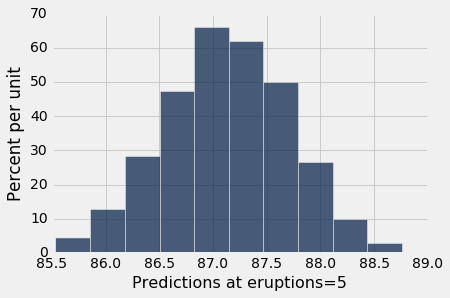

In [109]:
regression_lines_with_predictions.hist(2)

In [111]:
prediction_interval(5)

[86.004957314198322, 88.234877118540098]

**Question 2.9.** "Eyeball" the 95% confidence interval from this histogram.  Is it the same as the interval you could compute by calling `prediction_interval(5)`, or is that a different thing?

Yes it is the same

# 3. Testing numerical hypotheses

When we first saw hypothesis testing, we were testing hypotheses about categories.  For example, either a jury pool was a random sample from a population, or it wasn't.  But it's also useful to test hypotheses about numbers.  This is done very often in practice.  It turns out you already have the tool to do this: confidence intervals.

A confidence interval can be thought of as roughly a range of "plausible" values for the parameter we're trying to estimate. Suppose we want to test the hypothesis that the true parameter is equal to some particular value. If the observed value for a statistic seems "implausible" under the assumption that the null hypothesis is true, we reject the null hypothesis.

Let's be a little more precise. Suppose we want to test the hypothesis that the mean $\mu$ of a population is 50, at significance level 0.01. We can do the following:
- Null hypothesis: $\mu = 50$
- Alternative hypothesis: $\mu \neq 50$
- Strategy: Form a 99% confidence interval for $\mu$ (e.g. by the bootstrap method). If 50 lies outside the confidence interval, reject the null. Otherwise we fail to reject.

The degree of confidence should reflect the significance level of the test; if you wanted to test at the 5% level, you would use a 95% confidence interval.

(Extra information that's cool but you don't need to know for this lab: duality holds in the other direction as well. We can form a 95% confidence interval by taking the set of all values which, if they were the observed statistic during a hypothesis test at the 5% level, would lead to not rejecting the null.)

**Question 3.1.** Suppose a Stanford student looks at our earlier plots and claims that there is no relationship between the duration of the eruption and the waiting time to the next one. Recall the model at the beginning of sectino 1. In terms of that model, the claim that there is no relationship between eruption duration and waiting time is equivalent to a claim that the *slope* of the true regression line generating the data is 0. We want to formulate a hypothesis test to show that the student is misguided:
- Null hypothesis: The slope of the true regression line is zero.
- Alternative hypothesis: The slope of the true regression line is not zero.

Form an approximate 99% confidence interval to test this hypothesis. (_Hint_: use the `bootstrap_lines` function that we defined earlier.) Store your variable as a two-element list. The first element should be the lower bound, and the second the upper bound.

In [124]:
boot_lines = bootstrap_lines(1000)
slopes = boot_lines.column(0)
slope_interval = [percentile(0.5, slopes), percentile(99.5, slopes)]

slope_interval


9.9294770336952425

In [1]:
_ = lab13.grade("q31")

NameError: name 'lab13' is not defined

**Question 3.2** Do we have enough evidence to reject the null hypothesis? Write Python code to set `reject_furd` to `True` if we can reject the null hypothesis and `False` otherwise.

*Hint:* Remember that you can use logical operators `and` to combine two logical expressions into an expression that's true if both are true.  For example, `0 < x and x < 3` is true if `x` is between 0 and 3 (exclusive), and `not(0 < x and x < 3)` is true if `x` is less than 0 or more than 3.

In [131]:
# lower = slope_interval[0]
# upper = slope_interval[1]
# if x
# reject_furd = 
x = 2
reject_furd = np.logical_and(x > 0, x < 3)
reject_furd

True

In [132]:
_ = lab13.grade("q32")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



In [133]:
# For your convenience, you can run this cell to run all the tests at once!
import os
print("Running all tests...")
_ = [lab13.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]
print("Finished running all tests.")

Running all tests...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running t

In [134]:
# Run this cell to submit your work *after* you have passed all of the test cells.
# It's ok to run this cell multiple times. Only your final submission will be scored.

!TZ=America/Los_Angeles ipython nbconvert --output=".lab13_$(date +%m%d_%H%M)_submission.html" lab13.ipynb && echo "Submitted successfully."

[TerminalIPythonApp] WARNING | Subcommand `ipython nbconvert` is deprecated and will be removed in future versions.
[TerminalIPythonApp] WARNING | You likely want to use `jupyter nbconvert`... continue in 5 sec. Press Ctrl-C to quit now.
[NbConvertApp] Converting notebook lab13.ipynb to html
[NbConvertApp] Writing 494439 bytes to .lab13_0422_2155_submission.html
Submitted successfully.
